In [1]:
import MDAnalysis 
import numpy as np 
import pandas as pd
from MDAnalysis.analysis import align
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [2]:
exclude=[0, 3, 7, 8, 9]
gros = [f'../3_2P9H_R-IPT_MD/{i+1}_2p9h_R-IPT_em.gro'  for i in range(15) if i not in exclude]
xtcs = [f'../3_2P9H_R-IPT_MD/{i+1}_2p9h_R-IPT_fit.xtc'  for i in range(15) if i not in exclude]

In [3]:
xtcs

['../3_2P9H_R-IPT_MD/2_2p9h_R-IPT_fit.xtc',
 '../3_2P9H_R-IPT_MD/3_2p9h_R-IPT_fit.xtc',
 '../3_2P9H_R-IPT_MD/5_2p9h_R-IPT_fit.xtc',
 '../3_2P9H_R-IPT_MD/6_2p9h_R-IPT_fit.xtc',
 '../3_2P9H_R-IPT_MD/7_2p9h_R-IPT_fit.xtc',
 '../3_2P9H_R-IPT_MD/11_2p9h_R-IPT_fit.xtc',
 '../3_2P9H_R-IPT_MD/12_2p9h_R-IPT_fit.xtc',
 '../3_2P9H_R-IPT_MD/13_2p9h_R-IPT_fit.xtc',
 '../3_2P9H_R-IPT_MD/14_2p9h_R-IPT_fit.xtc',
 '../3_2P9H_R-IPT_MD/15_2p9h_R-IPT_fit.xtc']

In [4]:
len(xtcs)

10

In [5]:

try:
    df_all = pd.read_csv('./data/water_around_IPTG.csv')

except:
    data_all = []

    for traj_i in range(len(gros)):
        gro, xtc = gros[traj_i], xtcs[traj_i]
        u = MDAnalysis.Universe(gro, xtc)
        ref = MDAnalysis.Universe(gro)

        #sel = u.select_atoms('name OW and around 5 (resid 332 and name O3 O5 O7 O9 O11)', updating=True)

        sel = u.select_atoms('name OW and around 3.5 (resid 331)', updating=True, periodic=False)

        data = []
        for ts in u.trajectory[1000::5]: #start:end:step 
            sel.update_selection()
            t_frame = np.array([ts.frame]*len(sel)).reshape(-1,1)
            data.append(np.hstack((t_frame, sel.indices.reshape(-1,1), sel.positions)))
            #print(ts.frame, u.trajectory.time, len(sel))

        data_conc = np.concatenate(data)

        # make a pandas dataframe
        df = pd.DataFrame(data_conc, columns=['frame', 'index', 'x', 'y', 'z'])
        df['traj index'] = traj_i

        data_all.append(df)

    # conc all dataframes
    df_all = pd.concat(data_all).reset_index(drop=True)

    # save to csv
    if not os.path.exists('./data'):
        os.makedirs('./data')
        
    df_all.to_csv('./data/water_around_IPTG.csv', index=False)
    print('saved to./data/water_around_IPTG.csv')


In [6]:
import pyemma 

In [7]:
xtcs[4]

'../3_2P9H_R-IPT_MD/7_2p9h_R-IPT_fit.xtc'

/home/chenlin/anaconda3/envs/MD/lib/python3.10/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "pca". Called from /home/chenlin/anaconda3/envs/MD/lib/python3.10/site-packages/decorator.py line 232. Use sklearn.decomposition.PCA instead.
  return caller(func, *(extras + args), **kw)
/home/chenlin/anaconda3/envs/MD/lib/python3.10/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "pca". Called from /home/chenlin/anaconda3/envs/MD/lib/python3.10/site-packages/decorator.py line 232. Use sklearn.decomposition.PCA instead.
  return caller(func, *(extras + args), **kw)
/home/chenlin/anaconda3/envs/MD/lib/python3.10/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "pca". Called from /home/chenlin/anaconda3/envs/MD/lib/python3.10/site-packages/decorator.py line 232. Use sklearn.decomposition.PCA instead.
  return caller(func, *(extras + args), **kw)
/home/chenlin/anaconda3/envs/MD/li

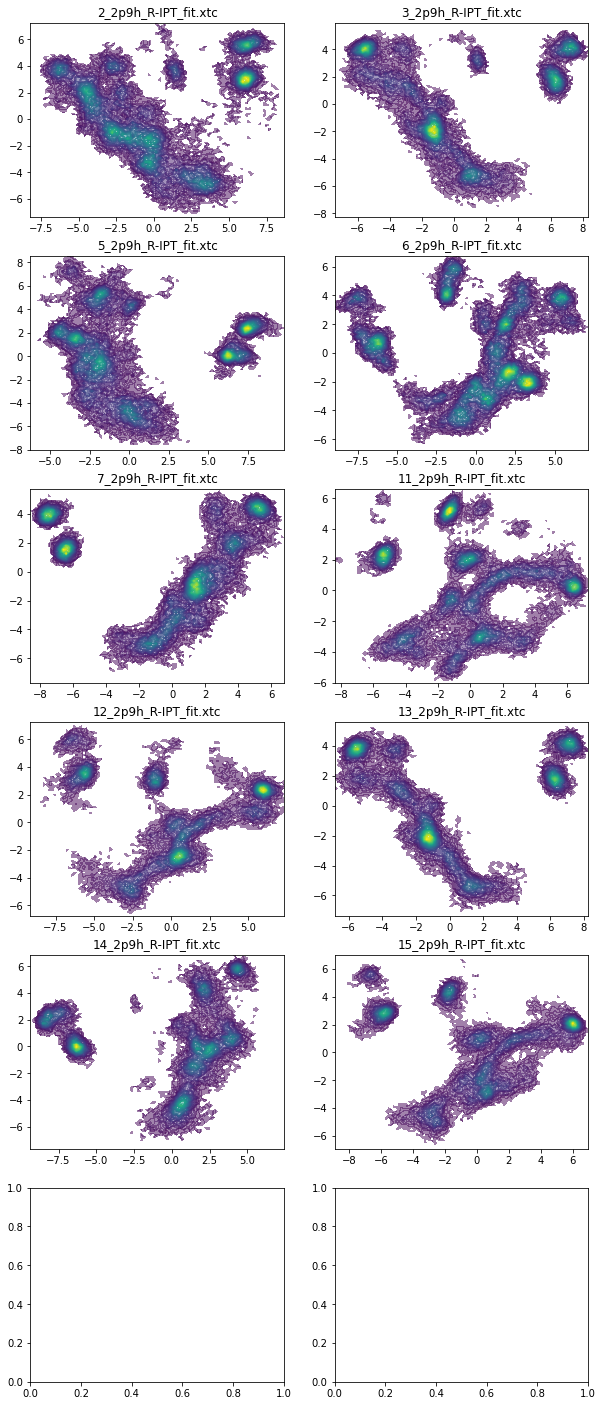

In [8]:
fig, axes = plt.subplots(6,2 , figsize=(10,5*5))

for traj_i in range(len(gros)):
    ax = axes.flatten()[traj_i]

    df = df_all[df_all['traj index'] == traj_i]


    pca = pyemma.coordinates.pca(df[['x', 'y', 'z']], dim=3)


    pca_output = pca.get_output()
    pca_conc = np.concatenate(pca_output)

    pyemma.plots.plot_density(
        *pca_conc[:, :2].T, cbar=False, alpha=0.5, ax=ax)


    ax.set_title(xtcs[traj_i].split('/')[-1])

In [9]:
from tqdm.notebook import tqdm  # progress bar (optional)
from deeptime.clustering import KMeans

/home/chenlin/anaconda3/envs/MD/lib/python3.10/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "pca". Called from /home/chenlin/anaconda3/envs/MD/lib/python3.10/site-packages/decorator.py line 232. Use sklearn.decomposition.PCA instead.
  return caller(func, *(extras + args), **kw)
/home/chenlin/anaconda3/envs/MD/lib/python3.10/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "pca". Called from /home/chenlin/anaconda3/envs/MD/lib/python3.10/site-packages/decorator.py line 232. Use sklearn.decomposition.PCA instead.
  return caller(func, *(extras + args), **kw)
/home/chenlin/anaconda3/envs/MD/lib/python3.10/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "pca". Called from /home/chenlin/anaconda3/envs/MD/lib/python3.10/site-packages/decorator.py line 232. Use sklearn.decomposition.PCA instead.
  return caller(func, *(extras + args), **kw)
/home/chenlin/anaconda3/envs/MD/li

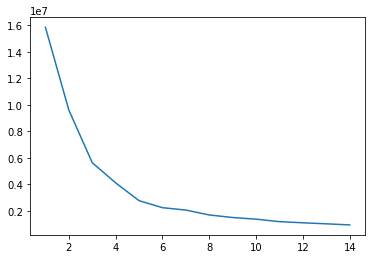

In [10]:
wss = []
for k in range(1, 15, 1):
    # Building and fitting the model

    pca = pyemma.coordinates.pca(df_all[['x', 'y', 'z']], dim=3)


    pca_output = pca.get_output()
    pca_conc = np.concatenate(pca_output)


    estimator = KMeans(
    n_clusters=k,  # place 100 cluster centers
    init_strategy='kmeans++',  # kmeans++ initialization strategy
    max_iter=1000,  # don't actually perform the optimization, just place centers
    #fixed_seed=13,
    n_jobs=20,
    progress=None
    )

    clustering = estimator.fit(pca_conc).fetch_model()
    dtrajs_concatenated = clustering.transform(pca_conc)

    #km = pyemma.coordinates.cluster_kmeans(pca_output, k=k, max_iter=100, stride=1)
    #dtrajs_concatenated = np.concatenate(km.dtrajs)

    wss_i = np.sum(np.sum((pca_conc - clustering.cluster_centers[dtrajs_concatenated])**2, axis=1))
    wss.append(wss_i)

plt.plot(range(1, 15, 1), wss)

In [11]:
pca = pyemma.coordinates.pca(df_all[['x', 'y', 'z']], dim=3)


pca_output = pca.get_output()
pca_conc = np.concatenate(pca_output)

estimator = KMeans(
    n_clusters=13,  # place 100 cluster centers
    init_strategy='kmeans++',  # kmeans++ initialization strategy
    max_iter=1000,  # don't actually perform the optimization, just place centers
    fixed_seed=1,
    n_jobs=20,
    progress=tqdm,
)

clustering = estimator.fit(pca_conc).fetch_model()

#km = pyemma.coordinates.cluster_kmeans(pca_output, k=11, max_iter=100, stride=1)
#reg_clustering = pyemma.coordinates.cluster_regspace(pca_output, dmin=2)

/home/chenlin/anaconda3/envs/MD/lib/python3.10/site-packages/decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "pca". Called from /home/chenlin/anaconda3/envs/MD/lib/python3.10/site-packages/decorator.py line 232. Use sklearn.decomposition.PCA instead.
  return caller(func, *(extras + args), **kw)


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [12]:
dtrajs_concatenated = clustering.transform(pca_conc)

#dtrajs_concatenated = np.concatenate(km.dtrajs)
df_all['cluster'] = dtrajs_concatenated

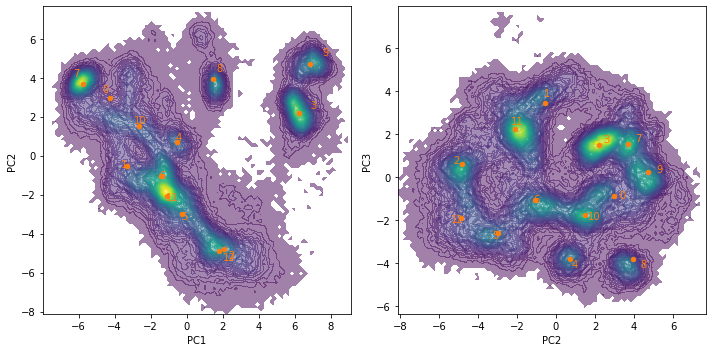

In [13]:
fig, axes = plt.subplots(1,2 , figsize=(10,5))

pyemma.plots.plot_density(
    *pca_conc[:, :2].T, ax=axes[0], cbar=False, alpha=0.5)
axes[0].scatter(*clustering.cluster_centers[:, :2].T, s=20, c='C1')
for i, cc in enumerate(clustering.cluster_centers):
    axes[0].text(cc[0]*1.1, cc[1]*1.1, str(i), fontsize=10, color='C1')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

pyemma.plots.plot_density(
    *pca_conc[:, 1:3].T, ax=axes[1], cbar=False, alpha=0.5)
axes[1].scatter(*clustering.cluster_centers[:, 1:3].T, s=20, c='C1')
for i, cc in enumerate(clustering.cluster_centers):
    axes[1].text(cc[1]*1.1, cc[2]*1.1, str(i), fontsize=10, color='C1')
axes[1].set_xlabel('PC2')
axes[1].set_ylabel('PC3')

fig.tight_layout()

In [14]:
df_all

,frame,index,x,y,z,traj index,cluster
0,1000,8288,33.260002,39.740002,36.410004,0,7
1,1000,8297,31.700001,42.090000,32.920002,0,0
2,1000,8357,32.740002,45.480003,29.200001,0,4
3,1000,10391,39.620003,41.410004,29.100000,0,2
4,1000,20252,36.580002,39.710003,30.320000,0,11
...,...,...,...,...,...,...,...
545269,31000,47969,33.700001,42.790001,29.970001,9,6
545270,31000,54536,34.580002,43.270000,27.250002,9,5
545271,31000,55484,36.400002,40.200001,30.040001,9,11
545272,31000,57353,41.510002,46.740002,31.840002,9,3


In [82]:
def get_max_frame_per_group(group):
    max_idx = group['frame'].idxmax()
    max_row = group.loc[max_idx]
    return max_row[['index', 'frame']]

def find_longest_dura_water(df_all, wat_cluster_index):
    cluster_df = df_all[df_all['cluster'] == wat_cluster_index]
    frame_count = cluster_df.groupby(['traj index', 'index']).count().sort_values('frame', ascending=False)
    frame_count = frame_count.reset_index()

    #max_idx = frame_count.loc[frame_count.groupby('traj index').groups[2]]['frame'].idxmax()
    #max_row = frame_count.loc[frame_count.groupby('traj index').groups[2]]['frame'][max_idx]
    max_frame_per_traj = frame_count.groupby('traj index').apply(get_max_frame_per_group)
    max_frame_per_center_idx = max_frame_per_traj['frame'].idxmax()
    max_frame_per_center = max_frame_per_traj.loc[max_frame_per_center_idx]
    #print(f'cluster {wat_cluster_index:02}\t',\
    #    f'traj {max_frame_per_center_idx:02}\t',\
    #    f"{int(max_frame_per_center['frame'])*0.05:>3.2f} ns") # per frame 
    
    return f"{int(max_frame_per_center['frame'])*0.05:>3.2f} ns"

# water occupancy
def wat_occupancy(df_all, wat_cluster_index):
    cluster_df = df_all[df_all['cluster'] == wat_cluster_index]
    avg = np.average(cluster_df.groupby(['traj index']).count()['frame']/(30000/5))*100
    std = np.std(cluster_df.groupby(['traj index']).count()['frame']/(30000/5))*100
    #print(f'cluster {wat_cluster_index:02}\t', f'{avg:.2f} %', '+/-', f'{std:.2f}')

    return f'{avg:.2f} %' + '+/-' + f'{std:.2f}'

In [104]:
# dura time 
wat_info = []
for wat_cluster_index in range(clustering.n_clusters):
    dura_time = find_longest_dura_water(df_all, wat_cluster_index)
    occu = wat_occupancy(df_all, wat_cluster_index)
    wat_info.append([wat_cluster_index,  
                    float(dura_time.split(' ')[0]),
                    float(occu.split(' ')[0]) - float(occu.split('+/-')[-1]),
                    float(occu.split(' ')[0]) + float(occu.split('+/-')[-1]) ])
    print(f'cluster {wat_cluster_index:02}\t', f'{dura_time: >5}\t', occu)
wat_info = pd.DataFrame(wat_info, columns = ['cluster', 'duration', 'occupancy_low', 'occupancy_high'])

cluster 00	 24.35 ns	 72.92 %+/-11.27
cluster 01	 64.80 ns	 54.42 %+/-35.24
cluster 02	 10.20 ns	 80.93 %+/-25.97
cluster 03	 299.85 ns	 101.78 %+/-2.74
cluster 04	 40.75 ns	 32.54 %+/-30.07
cluster 05	 46.20 ns	 59.28 %+/-11.41
cluster 06	 33.70 ns	 86.81 %+/-7.62
cluster 07	 82.00 ns	 71.76 %+/-27.76
cluster 08	 137.75 ns	 46.64 %+/-35.92
cluster 09	 265.50 ns	 58.28 %+/-31.19
cluster 10	 28.45 ns	 64.80 %+/-11.49
cluster 11	 193.85 ns	 128.77 %+/-13.46
cluster 12	 7.85 ns	 59.16 %+/-21.93


In [105]:
wat_info

,cluster,duration,occupancy_low,occupancy_high
0,0,24.35,61.65,84.19
1,1,64.80,19.18,89.66
2,2,10.20,54.96,106.90
3,3,299.85,99.04,104.52
4,4,40.75,2.47,62.61
5,5,46.20,47.87,70.69
6,6,33.70,79.19,94.43
7,7,82.00,44.00,99.52
8,8,137.75,10.72,82.56
9,9,265.50,27.09,89.47


In [107]:
wat_info.sort_values(['occupancy_low','occupancy_high', 'duration'], ascending=False)

,cluster,duration,occupancy_low,occupancy_high
11,11,193.85,115.31,142.23
3,3,299.85,99.04,104.52
6,6,33.70,79.19,94.43
0,0,24.35,61.65,84.19
2,2,10.20,54.96,106.90
10,10,28.45,53.31,76.29
5,5,46.20,47.87,70.69
7,7,82.00,44.00,99.52
12,12,7.85,37.23,81.09
9,9,265.50,27.09,89.47


In [77]:
# occupancies
for wat_cluster_index in range(clustering.n_clusters):
    wat_occupancy(df_all, wat_cluster_index)


cluster 00	 72.92 % +/- 11.27
cluster 01	 54.42 % +/- 35.24
cluster 02	 80.93 % +/- 25.97
cluster 03	 101.78 % +/- 2.74
cluster 04	 32.54 % +/- 30.07
cluster 05	 59.28 % +/- 11.41
cluster 06	 86.81 % +/- 7.62
cluster 07	 71.76 % +/- 27.76
cluster 08	 46.64 % +/- 35.92
cluster 09	 58.28 % +/- 31.19
cluster 10	 64.80 % +/- 11.49
cluster 11	 128.77 % +/- 13.46
cluster 12	 59.16 % +/- 21.93


In [36]:
find_longest_dura_water(df_all, 0)

cluster 00	 traj 08	 24.35 ns


,index,frame
traj index,,
0,18530,98
1,39467,189
2,52346,190
3,40151,195
4,9992,72
5,24770,314
6,39086,184
7,18899,89
8,26675,487


In [23]:
find_longest_dura_water(df_all, 1)

cluster 01	 traj 03	 12.96 ns


,index,frame
traj index,,
0,20273,259
1,58673,95
2,50651,644
3,20846,1296
4,45317,438
5,47990,271
6,24830,36
7,27053,59
8,35021,1094


In [252]:
# save structure for each cluster
if not os.path.exists('./structures'):
    os.mkdir('./structures')

traj_i = 0 
u = MDAnalysis.Universe(gros[traj_i], xtcs[traj_i])
for wat_cluster_index in range(clustering.n_clusters):
    cluster_df = df_all[(df_all['cluster'] == wat_cluster_index) & (df_all['traj index'] == traj_i)]
    cluster_df.groupby('index').count().sort_values('frame', ascending=False)
    representative_wat_index = int(cluster_df.groupby('index').count().sort_values('frame', ascending=False).index[0])
    cluster_df = cluster_df[cluster_df['index'] == representative_wat_index]


    with MDAnalysis.Writer(f'./structures/wat_cluster_{wat_cluster_index}.pdb', multiframe=True, bonds=None, n_atoms=u.atoms.n_atoms) as PDB:
        for i, ts in enumerate(u.trajectory[cluster_df['frame'].values.astype(int)]):
            wat_index = cluster_df['index'].values.astype(int)[i]
            write_sel = u.select_atoms(f'index {wat_index}')
            #print(u.trajectory.frame, wat_index)
            PDB.write(write_sel)


/home/chenlin/anaconda3/envs/MD/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/home/chenlin/anaconda3/envs/MD/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/home/chenlin/anaconda3/envs/MD/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'chainIDs' Using default value of ''
  warnings.warn("Found no information for attr: '{}'"
/home/chenlin/anaconda3/envs/MD/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:1129: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  warnings.warn("Found no information for attr: '{}'"
/home/chenlin/anaconda3/envs/MD/lib/python3.10/site-packages/MDAnal